## This example is from Kaggle
https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn/notebook
### Here I am using Scikit Learn learning library to build machine learning model using k-Nearest Neighbors algorithm to predict whether the pationts in the "Pima Indians Diabetes Dataset" have diabetes or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, auc, roc_curve
import seaborn as sns

In [2]:
# read the dataset
data = pd.read_csv('diabetes.csv')

# print the head of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# number of attributes and observations 
observations, attributes = data.shape 
print('The dataset consists of', observations, 'observations', 'and', attributes, 'attributes') 

The dataset consists of 768 observations and 9 attributes


In [4]:
# Checking whether there is missing data or not
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\nazan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

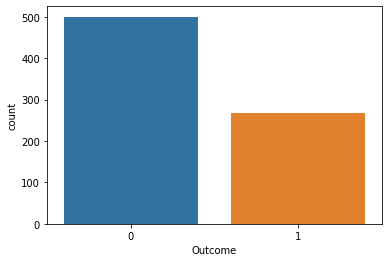

In [5]:
sns.countplot(data.iloc[:,-1])

In [6]:
print('Class Ratio:', (sum(data['Outcome']/len(data['Outcome'])))*100)

Class Ratio: 34.89583333333326


Based on the figuer, most of the targets are in class 0 (non-Diabetes). Moreover, 34.90% of the data are from class 1. If random sampling is used, the accuracy score will not be appropriate because the the training set will not present the whole of the dataset. It is better to use stratified sampling to have trainig set whcih presents the whole of the dataset. 

#### data scaling 

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Because the min, max, mean of the features are vary. It is better to standard the scale of the features. 
For this we used normalization becasue we don't have a idea of the distribution of data in KNN algorithm.

First, demostrate X and y

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
# Normalize the features 
norm = MinMaxScaler()
X = norm.fit_transform(X)

In the code below, you can see that every fold in stratified method has the same ratio 

In [10]:
# Apply StraifiedKfold
# If shuffle is set to True, then the splitting will be random
# If shuffle is set to False, consecutive folds will be the shifted version of previous folds
# If we want the splits to be reproducible, we also need to pass in an integer to random_state parameter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [11]:
fold_num = 1
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold %0.0f , class ratio: %0.2f'%(fold_num,(sum(y_train/len(y_train)))*100))
    fold_num += 1

Fold 1 , class ratio: 34.85
Fold 2 , class ratio: 34.85
Fold 3 , class ratio: 34.85
Fold 4 , class ratio: 34.96
Fold 5 , class ratio: 34.96


### Choosing a K Value

In [12]:
n_neighbors = np.arange(1,70)
error_rate = np.empty(len(n_neighbors))
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))

# defined a range for K

for i,k in enumerate(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Compute error 
    error_rate[i] = (np.mean(y_pred != y_test))
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Computr accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

Plot a Line graph of the error rate:

Text(0.5, 1.0, 'Error Rate vs. K Value')

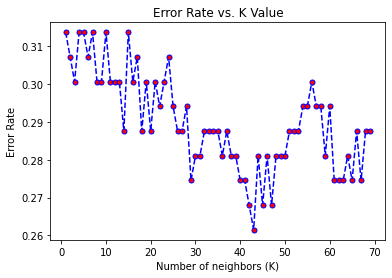

In [13]:
plt.plot(n_neighbors, error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor='red', markersize = 5)
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')

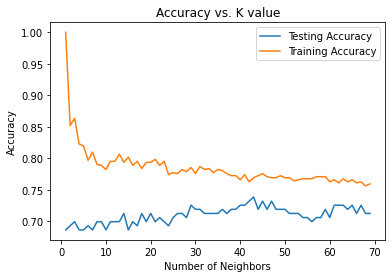

In [14]:
plt.plot(n_neighbors, test_accuracy, label= "Testing Accuracy")
plt.plot(n_neighbors, train_accuracy, label= "Training Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K value")
plt.legend()

Here we can see that K ~ 43 has lower error, and after that the error rate will increase again. 
Instead of find a K value with for loop, we could find it with module name Gridsearch. Also, other parameters like weights, distances, and algorithm will effect on finding a optimum value of K. 

In [26]:
# Apply Gridsearch to findn the optimum prameters (number of neighbors and distance)
param_grid = {'n_neighbors': list(range(1,40)),'p':[1,2,3], 'weights':['uniform','distance']}
knn2 = KNeighborsClassifier()
gs = GridSearchCV(knn2,param_grid, scoring='average_precision', cv=5,verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='average_precision', verbose=1)

In [27]:
print("Best Score: %.3f" % gs.best_score_, '\nBest Parameters: ', gs.best_params_)

Best Score: 0.734 
Best Parameters:  {'n_neighbors': 34, 'p': 1, 'weights': 'distance'}


In [28]:
print('Test Score: %.3f' % gs.score(X_test, y_test))

Test Score: 0.671


In [29]:
knn2 = KNeighborsClassifier(n_neighbors= gs.best_params_.get('n_neighbors'), p = gs.best_params_.get('p'), weights=gs.best_params_.get('weights'))
knn2.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

In [30]:
print("The accuracy on test data for p=", gs.best_params_.get('p') ,'and K=', gs.best_params_.get('n_neighbors'), "is: %.2f" %accuracy_score(y_test, y_pred2))

The accuracy on test data for p= 1 and K= 34 is: 0.71


In [31]:
# Tabulating the grid search
# You can see the last 40 results
pd.concat([pd.DataFrame(gs.cv_results_["params"]),pd.DataFrame(gs.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).tail(40)   

,n_neighbors,p,weights,Accuracy
194,33,2,uniform,0.703989
195,33,2,distance,0.720785
196,33,3,uniform,0.705180
197,33,3,distance,0.723786
198,34,1,uniform,0.720186
199,34,1,distance,0.733905
200,34,2,uniform,0.708261
201,34,2,distance,0.723663
202,34,3,uniform,0.706761
203,34,3,distance,0.722997


### Confusion Matrix

A Confusion is a table that describes the performance of a classification model. 

In [32]:
print("The confusion matrix for p=", gs.best_params_.get('p') ,'and K=', gs.best_params_.get('n_neighbors'), "is:", confusion_matrix(y_test, y_pred2))

The confusion matrix for p= 1 and K= 34 is: [[91  9]
 [35 18]]


In [33]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81       100
           1       0.67      0.34      0.45        53

    accuracy                           0.71       153
   macro avg       0.69      0.62      0.63       153
weighted avg       0.70      0.71      0.68       153



### ROC (Reciever Operating Charecteristics) curve

ROC curve is a plot of the True positive rate (Sensitivity) vs. the False positive rate (Specificity). The area under the curve (AUC) is a measure of test accuracy. 

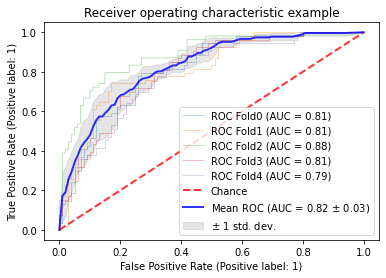

In [34]:
fold_num = 1
fig, ax = plt.subplots()
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

for i, (train, test) in enumerate (skf.split(X,y)):
    knn2.fit(X[train], y[train])
    vis = plot_roc_curve(knn2, X[test], y[test], name = 'ROC Fold{}'.format(i),
                        alpha = 0.3, lw = 1, ax = ax)
    interp_tpr = np.interp(mean_fpr, vis.fpr, vis.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(vis.roc_auc)
    
ax.plot([0,1],[0,1], linestyle='--', lw=2,color='r', label='Chance',
       alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('plot.png')